In [158]:
import pandas as pd

activity = pd.read_csv("C:\\Users\\acorn\\Downloads\\champion_data\\train\\train_activity.csv")
activity = activity.sort_values(["acc_id", "wk"])
label = pd.read_csv("C:\\Users\\acorn\\Downloads\\champion_data\\train\\train_label.csv")
label = label.sort_values("acc_id")

In [205]:
df = activity.groupby("acc_id").mean()
df.head()
df = pd.merge(df, label, on="acc_id")
df1 = df.drop(["acc_id", "wk", "label"], 1)
df1.head()

(100000, 36)

In [ ]:
df2 = df1.astype("float32")
df2.dtypes

In [162]:
dic = {"retained":0., "week":1., "month":2., "2month":3.}
label["label"] = label["label"].apply(lambda x: dic[x])

In [166]:
label["label"] = label["label"].astype("float32")
label.dtypes

acc_id     object
label     float32
dtype: object

In [188]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array(df2)
y_data = np.array(label)[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 4

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 36])
Y = tf.placeholder(tf.int32, shape=[None, 1])

Y_one_hot = tf.one_hot(Y, nb_classes)
print("one_hot: ", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape: ", Y_one_hot)

W = tf.Variable(tf.random_normal([36, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

logits = tf.matmul(X, W) + b
hypothesis = logits
#hypothesis = tf.nn.softmax(logits)
#hypothesis = tf.sigmoid(logits)
#hypothesis = tf.nn.tanh(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(100000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


(100000, 36) (100000, 1)
one_hot:  Tensor("one_hot_20:0", shape=(?, 1, 4), dtype=float32)
reshape:  Tensor("Reshape_11:0", shape=(?, 4), dtype=float32)
Step:     0	Loss: 7.688	Acc: 28.60%
Step:   200	Loss: 1.311	Acc: 50.84%
Step:   400	Loss: 1.227	Acc: 53.97%
Step:   600	Loss: 1.176	Acc: 54.72%
Step:   800	Loss: 1.143	Acc: 55.11%
Step:  1000	Loss: 1.123	Acc: 55.32%
Step:  1200	Loss: 1.110	Acc: 55.47%
Step:  1400	Loss: 1.100	Acc: 55.66%
Step:  1600	Loss: 1.092	Acc: 55.79%


KeyboardInterrupt: 

In [ ]:
# 다양체란 (maifold )
# - 고차원 공간 중에 존재하는 실질적으로는 보다 저차원으로 표시 가능한 도형
# - local 구조와 global 구조를 유지 

# PCA, MDS 고차원을 저차원으로 변환, manifold = 다양체 

# MDS- 선형변환에는 강하지만, 비선형 변환에는 약함 
# Rotate, Scale, Mase - 선형 변환
# curling , bending, crumbling - 비선형 변환

# 임베디드 값 (고차원이 2차원, 3차원으로 변환된 값) , 스트레스 값 

# 다차원 척도법 (Multidimensional scaling)
# - 객체간 근접성을 시각화하는 통계기법
# - 군집분석과 같이 개체들을 대상으로 변수들으 측정한 후에 개체들 사이의 유사성/비유사성을 측정하여
# 객체들을 2차원 공간 상에 점으로 표현하는 분석 방법
# - 개체들을 2차원, 3차원 공간 상에 점으로 표현하여 개체들 사이의 집단화를 시각적으로 표현하는 분석방법
# - 개체거리 계산
# - 관측 대상들의 상대적 거리의 정확도를 높이기 위해 적합 정도를 스트레스 값으로 표현
#  - 각 개체들을 공간상에 표현하기 위한 방법은 부적합도 기준으로 stress나 s-stress로 표현 
# - 최적모형의 적합은 부적합도를 최소로 하는 반복 알고리즘을 이용하여 이 값이 일정 수준 이하로 될 때 최종적으로 적합된 도형을 제시

In [194]:
reduced_images = []
for n_components in [10,50,100,500]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_back = pca.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)
    
fix, axes = plt.subplots(3,5, figsize=(15, 12),
                        subplot_kw = {'xticks': (), 'yticks': ()})

for i, ax in enumerate(axes):
    ax[0].imshow(X_test[i].reshape(image_shape), vmin=0, vmax=1)
    for a, X_test_back  in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)
        
        
axes[0,0].set_title("원래 이미지")
for ax, n_components in zip(axes[0,1:], [10,50,100,500]):
    ax.set_title("%d개 주성분으로 복원"%n_components)

ValueError: n_components=100 must be between 0 and n_features=64 with svd_solver='full'

AttributeError: module 'matplotlib.cm' has no attribute 'binaryl'

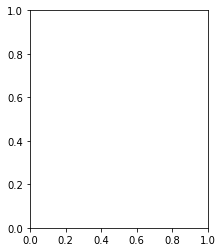

In [200]:
# MNIST compression 
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

mnist =load_digits()

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

pca =PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.sum(pca.explained_variance_ratio_)

pca = PCA(n_components = 28)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instances.reshape(size, size) for instances in instances]
    n_rows = (len(instances) -1) // images_per_row +1
    row_images =[]
    n_empty = n_rows * images_per_row -len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows ):
        rimages = images[row* images_per_row : (row +1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis =1))
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = matplotlib.cm.binaryl, **options)
    plt.axis("off")
    
import matplotlib.pyplot as plt

plt.figure(figsize = (7,4))
plt.subplot(121)
plot_digits(X_train[::64])
plt.title("원본",fontsize = 16)
plt.subplot(122)
plot_digits(X_recovered[::64])
plt.title("압축", fontsize = 16)

NameError: name 'KMeans' is not defined

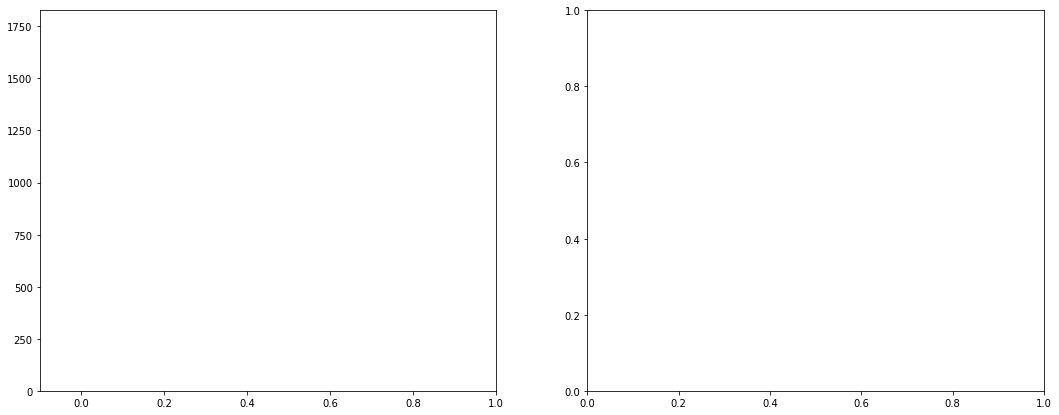

In [203]:
# silhouette_samples : 샘플당, silhouette_score: 전체적 

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) *10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    clusterer = KMeans(n_clusters = n_clusters , random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("클러스터 수 = ", n_clusters,
         "평균 silhouette_score : ", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower =10
    
    # 값의 범위가 -1~ 1 0이면 중복되어 있다. -로 가면 잘 못분류되어 있다. 
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels ==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor = color, edgecolor =color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha = 0.7,
               c = colors ,edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:,1], marker='o',
               c = "white", alpha = 1 , s= 200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s= 50, edgecolor = 'k')
    plt.show()
    

In [202]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#한개는 분리되어 있고 세개는 모여있는 
X, y= make_blobs(n_samples=500, #행갯
                 n_features=2,
                 centers=4, 
                 cluster_std=1,
                 center_box=(-10.0,10.0),
                 shuffle=True,
                 random_state=1)

#silhouette_sample:per sample, silhoutte_score: total
# silhouette_samples : 샘플당, silhouette_score: 전체적 

NameError: name 'make_blobs' is not defined

....................

AttributeError: module 'matplotlib.cm' has no attribute 'binaryl'

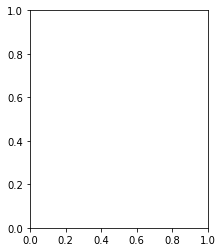

In [201]:
from sklearn.decomposition import IncrementalPCA

n_batches =20
inc_pca = IncrementalPCA(n_components=28)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)
    
    
X_reduced = inc_pca.transform(X_train)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::64])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::64])
plt.tight_layout()
X, t = make_swiss_roll(n_samples=1000, noise =0.2, random_state=42)

from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components =2, kernel = "linear",
                   fit_inverse_transform=True)

lin_pca = KernelPCA(n_components =2, kernel = "rbf", gamma=0.0433
                   ,fit_inverse_transform=True)

lin_pca = KernelPCA(n_components =2, kernel = "sigmoid", gamma = 0.001,
                    coef0=1, fit_inverse_transform=True)

In [ ]:
# 2차원으로 시각화
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
# MDS, t-SNE


In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

for subplot, title, X_reduced in zip((131,132,133), title,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
plt.show()

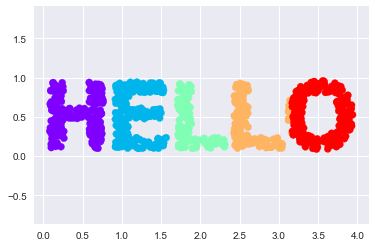

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

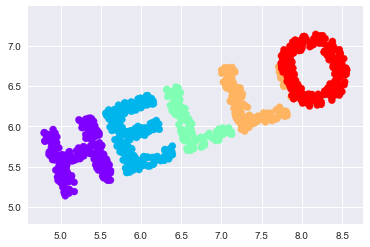

In [212]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


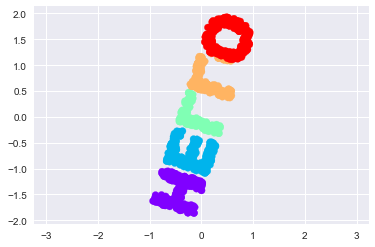

In [216]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');
print(out)

In [217]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape    

(1000, 3)

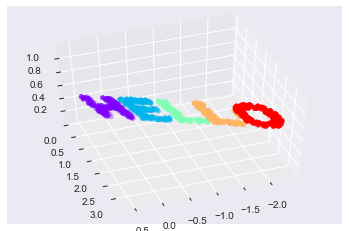

In [218]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

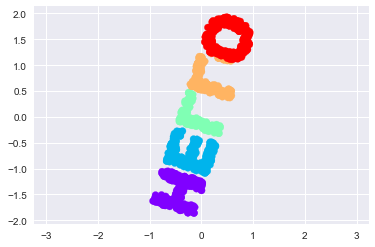

In [219]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

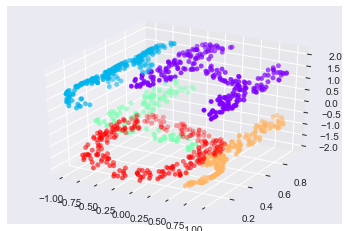

In [220]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

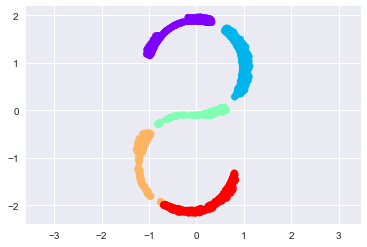

In [222]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

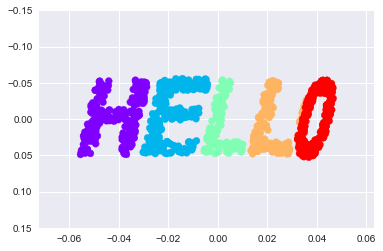

In [223]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

D2 = pairwise_distances(X2)
np.allclose(D, D2)

from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [232]:
for i in range(1,101):
    print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [229]:
(2**15-1)

32767